In [1]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install matplotlib_venn

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly
import plotly.express as px
import plotly.graph_objs as go
import seaborn as sns
from sklearn.preprocessing import StandardScaler
sns.set()

In [7]:
#Made datasets containing the top portion of proteins overexpressed, following normalisation (see methods).
#Loading dataset for normalised FC values over 2.
data = pd.read_csv(r'/Users/katemeeson/Library/Mobile Documents/com~apple~CloudDocs/MRC-DTP PhD UoM/Modelling/Proteomics/Subsets for heatmaps /12052021_over_2FC.csv', index_col=[0])
N, D = data.shape
print('Samples: %s, Proteins: %s'%(D, N))
data

Samples: 9, Proteins: 160


,1_FC0_UNIMAN,2_FC0_UNIMAN,3_FC0_UNIMAN,1_FC100_UNIMAN,2_FC100_UNIMAN,3_FC100_UNIMAN,1_FC500_UNIMAN,2_FC500_UNIMAN,3_FC500_UNIMAN
Accession,,,,,,,,,
TX1B3_HUMAN,5.642148,8.480468,0.000000,3.102920,5.091712,4.182930,38.784656,33.209700,26.484104
SCRN1_HUMAN,10.019205,0.000000,0.000000,6.412637,16.164423,16.735344,22.499150,21.775483,34.869411
CC124_HUMAN,135.155064,430.538219,272.342514,193.353911,71.837148,60.872976,33.191386,8.997815,65.235702
RCN3_HUMAN,8.274586,9.069242,18.973376,0.000000,1.910823,2.876297,11.402255,18.000686,4.795761
TYB4_HUMAN,5600.093439,4668.698011,5106.471182,1143.577042,1699.399043,1647.438245,841.055100,634.822082,555.841084
...,...,...,...,...,...,...,...,...,...
DEUP1_HUMAN,34.274361,27.842598,52.439675,50.223300,134.072244,144.976482,196.185223,172.167747,94.025983
RAB1A_HUMAN,13.237880,13.084458,52.386689,2.792970,7.538406,9.191612,13.777769,20.132268,30.428225
TIM9_HUMAN,278.836530,159.795847,39.838096,20.945837,105.425924,114.590499,377.460129,324.846762,267.555242


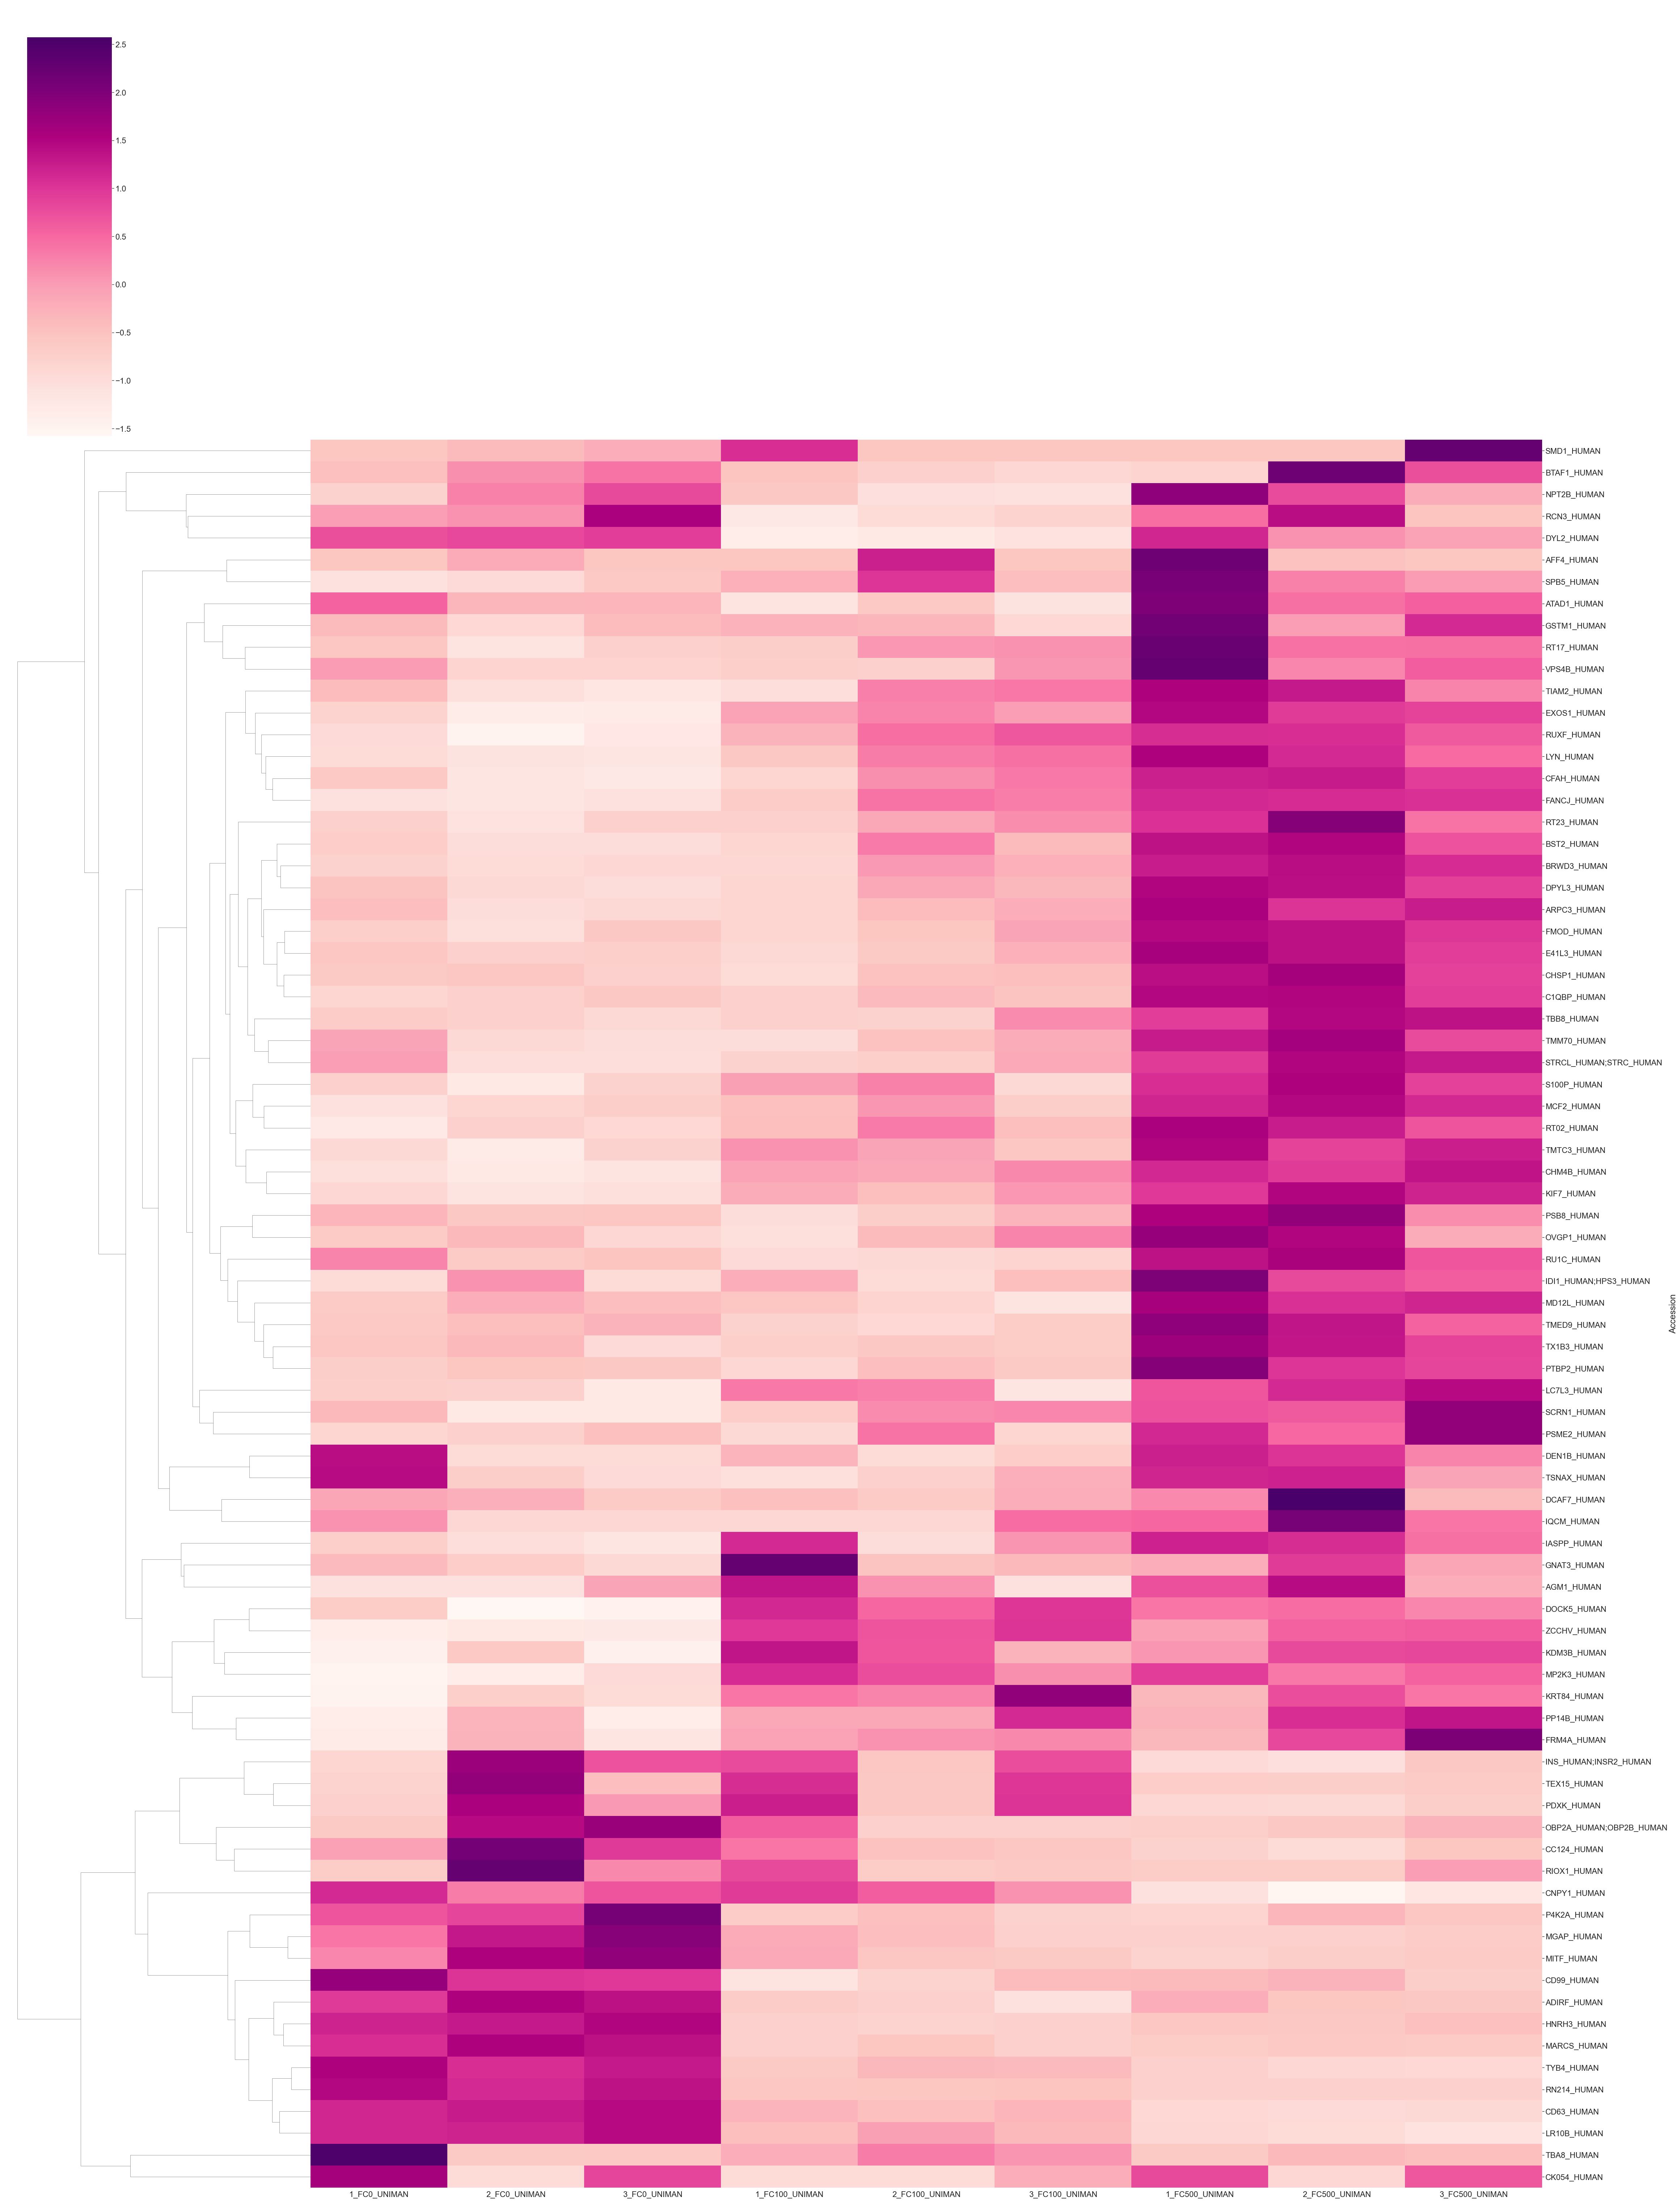

In [8]:
#Heat map for first half of dataset.
df_norm_row=data.sub(data.mean(axis=1), axis=0)
df_norm_row=df_norm_row.div( data.std(axis=1), axis=0 )
sns.set(font_scale = 2)
sns.clustermap(df_norm_row.iloc[0:80, 0:10], cmap='RdPu', figsize=(65,85), col_cluster=False)
plt.savefig('12052021above2FC1.png')

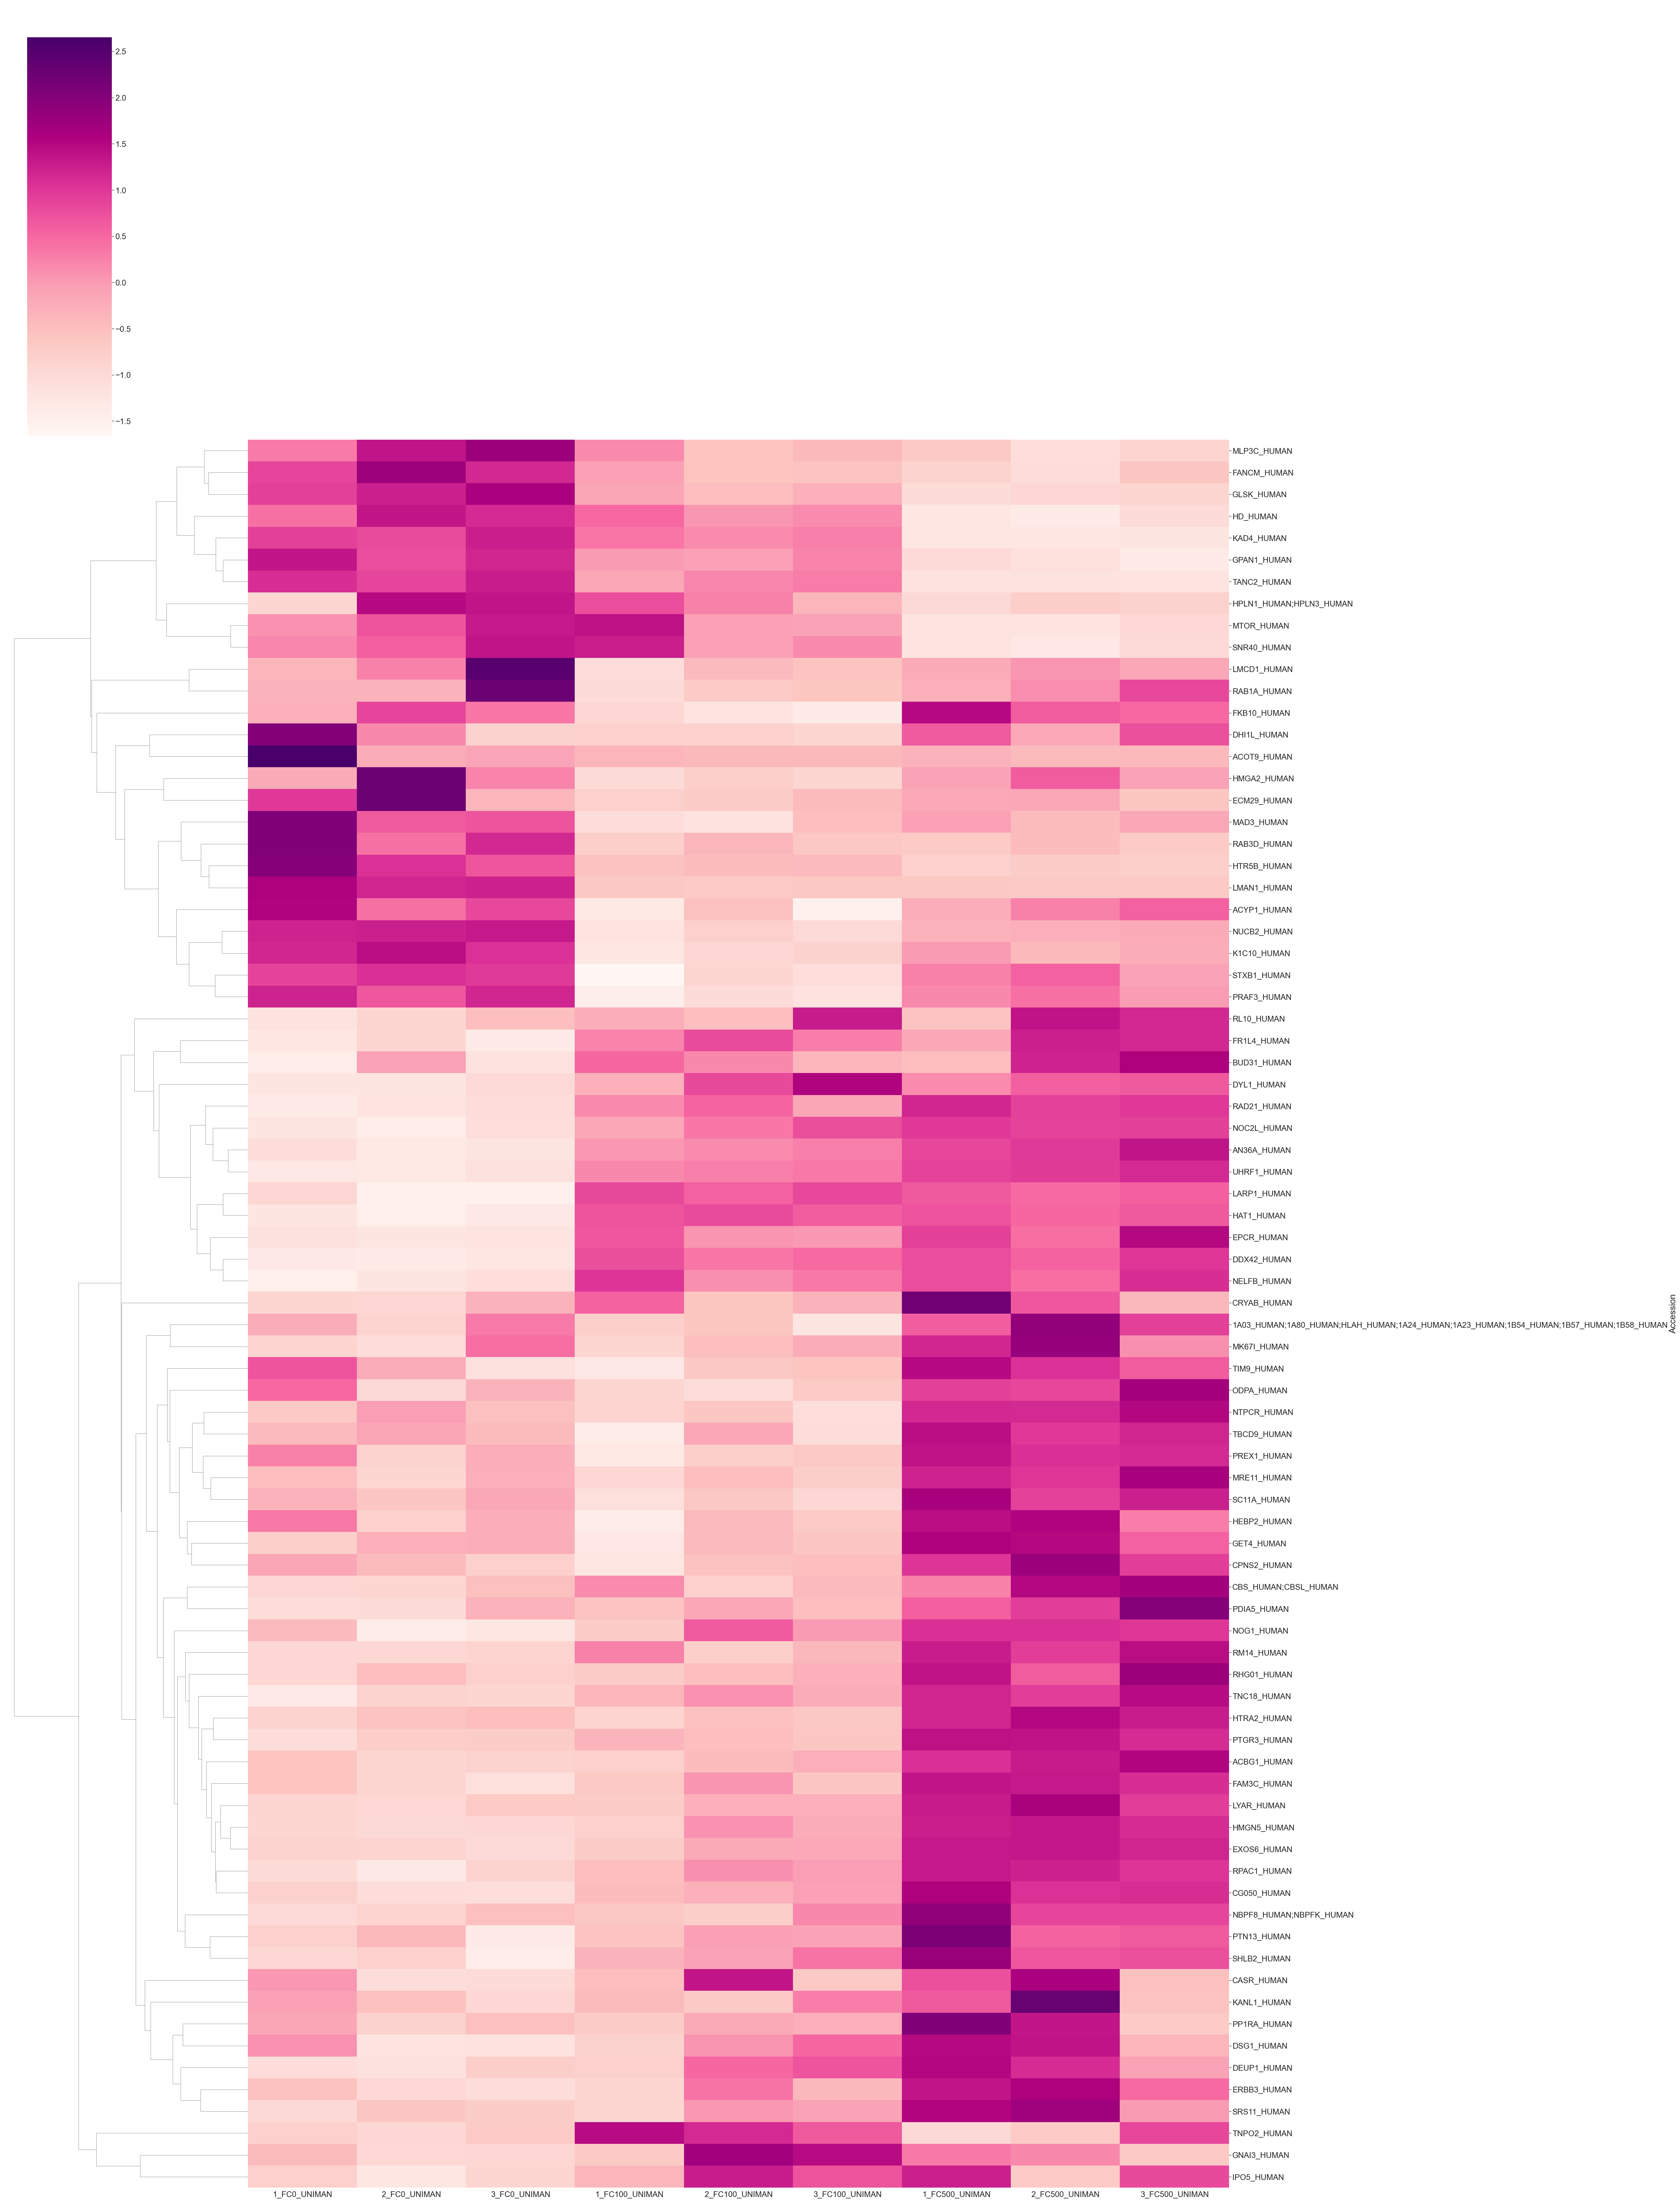

In [9]:
#Heat map for second half of dataset.
df_norm_row=data.sub(data.mean(axis=1), axis=0)
df_norm_row=df_norm_row.div( data.std(axis=1), axis=0 )
sns.set(font_scale = 2)
sns.clustermap(df_norm_row.iloc[80:161, 0:10], cmap='RdPu', figsize=(65,85), col_cluster=False)
plt.savefig('12052021above2FC2.png')

In [10]:
#Loading dataset for proteins with normalised FC between 3 and 12.
data = pd.read_csv(r'/Users/katemeeson/Library/Mobile Documents/com~apple~CloudDocs/MRC-DTP PhD UoM/Modelling/Proteomics/Subsets for heatmaps /12052021 over 3 FC.csv', index_col=[0])
N, D = data.shape
print('Samples: %s, Proteins: %s'%(D, N))
data

Samples: 9, Proteins: 117


,1_FC0_UNIMAN,2_FC0_UNIMAN,3_FC0_UNIMAN,1_FC100_UNIMAN,2_FC100_UNIMAN,3_FC100_UNIMAN,1_FC500_UNIMAN,2_FC500_UNIMAN,3_FC500_UNIMAN
Accession,,,,,,,,,
PDXD1_HUMAN,0.000000,111.986066,41.307885,0.036454,0.000000,0.000000,0.000000,0.000000,26.924753
L37A1_HUMAN;L37A2_HUMAN,0.000000,449.060607,85.304582,0.368859,0.000000,0.000000,0.000000,0.000000,892.575044
MAP1B_HUMAN,0.000000,548.033062,0.143062,1261.666797,0.000000,48.820157,0.293873,0.478752,0.079506
RLA1_HUMAN,0.025635,0.008146,0.016454,0.006230,0.036284,0.023154,2.959620,1.027893,6.013412
HPDL_HUMAN,3.777051,4.851680,6.114426,103.779995,210.256998,181.965510,836.186629,722.019286,696.026045
...,...,...,...,...,...,...,...,...,...
PDE12_HUMAN,12.131912,23.336823,9.605102,82.898135,50.647984,117.112366,133.359466,135.369872,104.740610
NELFA_HUMAN,14.051547,2.912346,10.550534,14.149868,42.026533,48.604620,67.870376,67.680929,89.241053
HNRPM_HUMAN,68.219213,2475.740013,256.108836,2004.480786,104.258399,2161.811922,160.196226,171.732016,193.429576


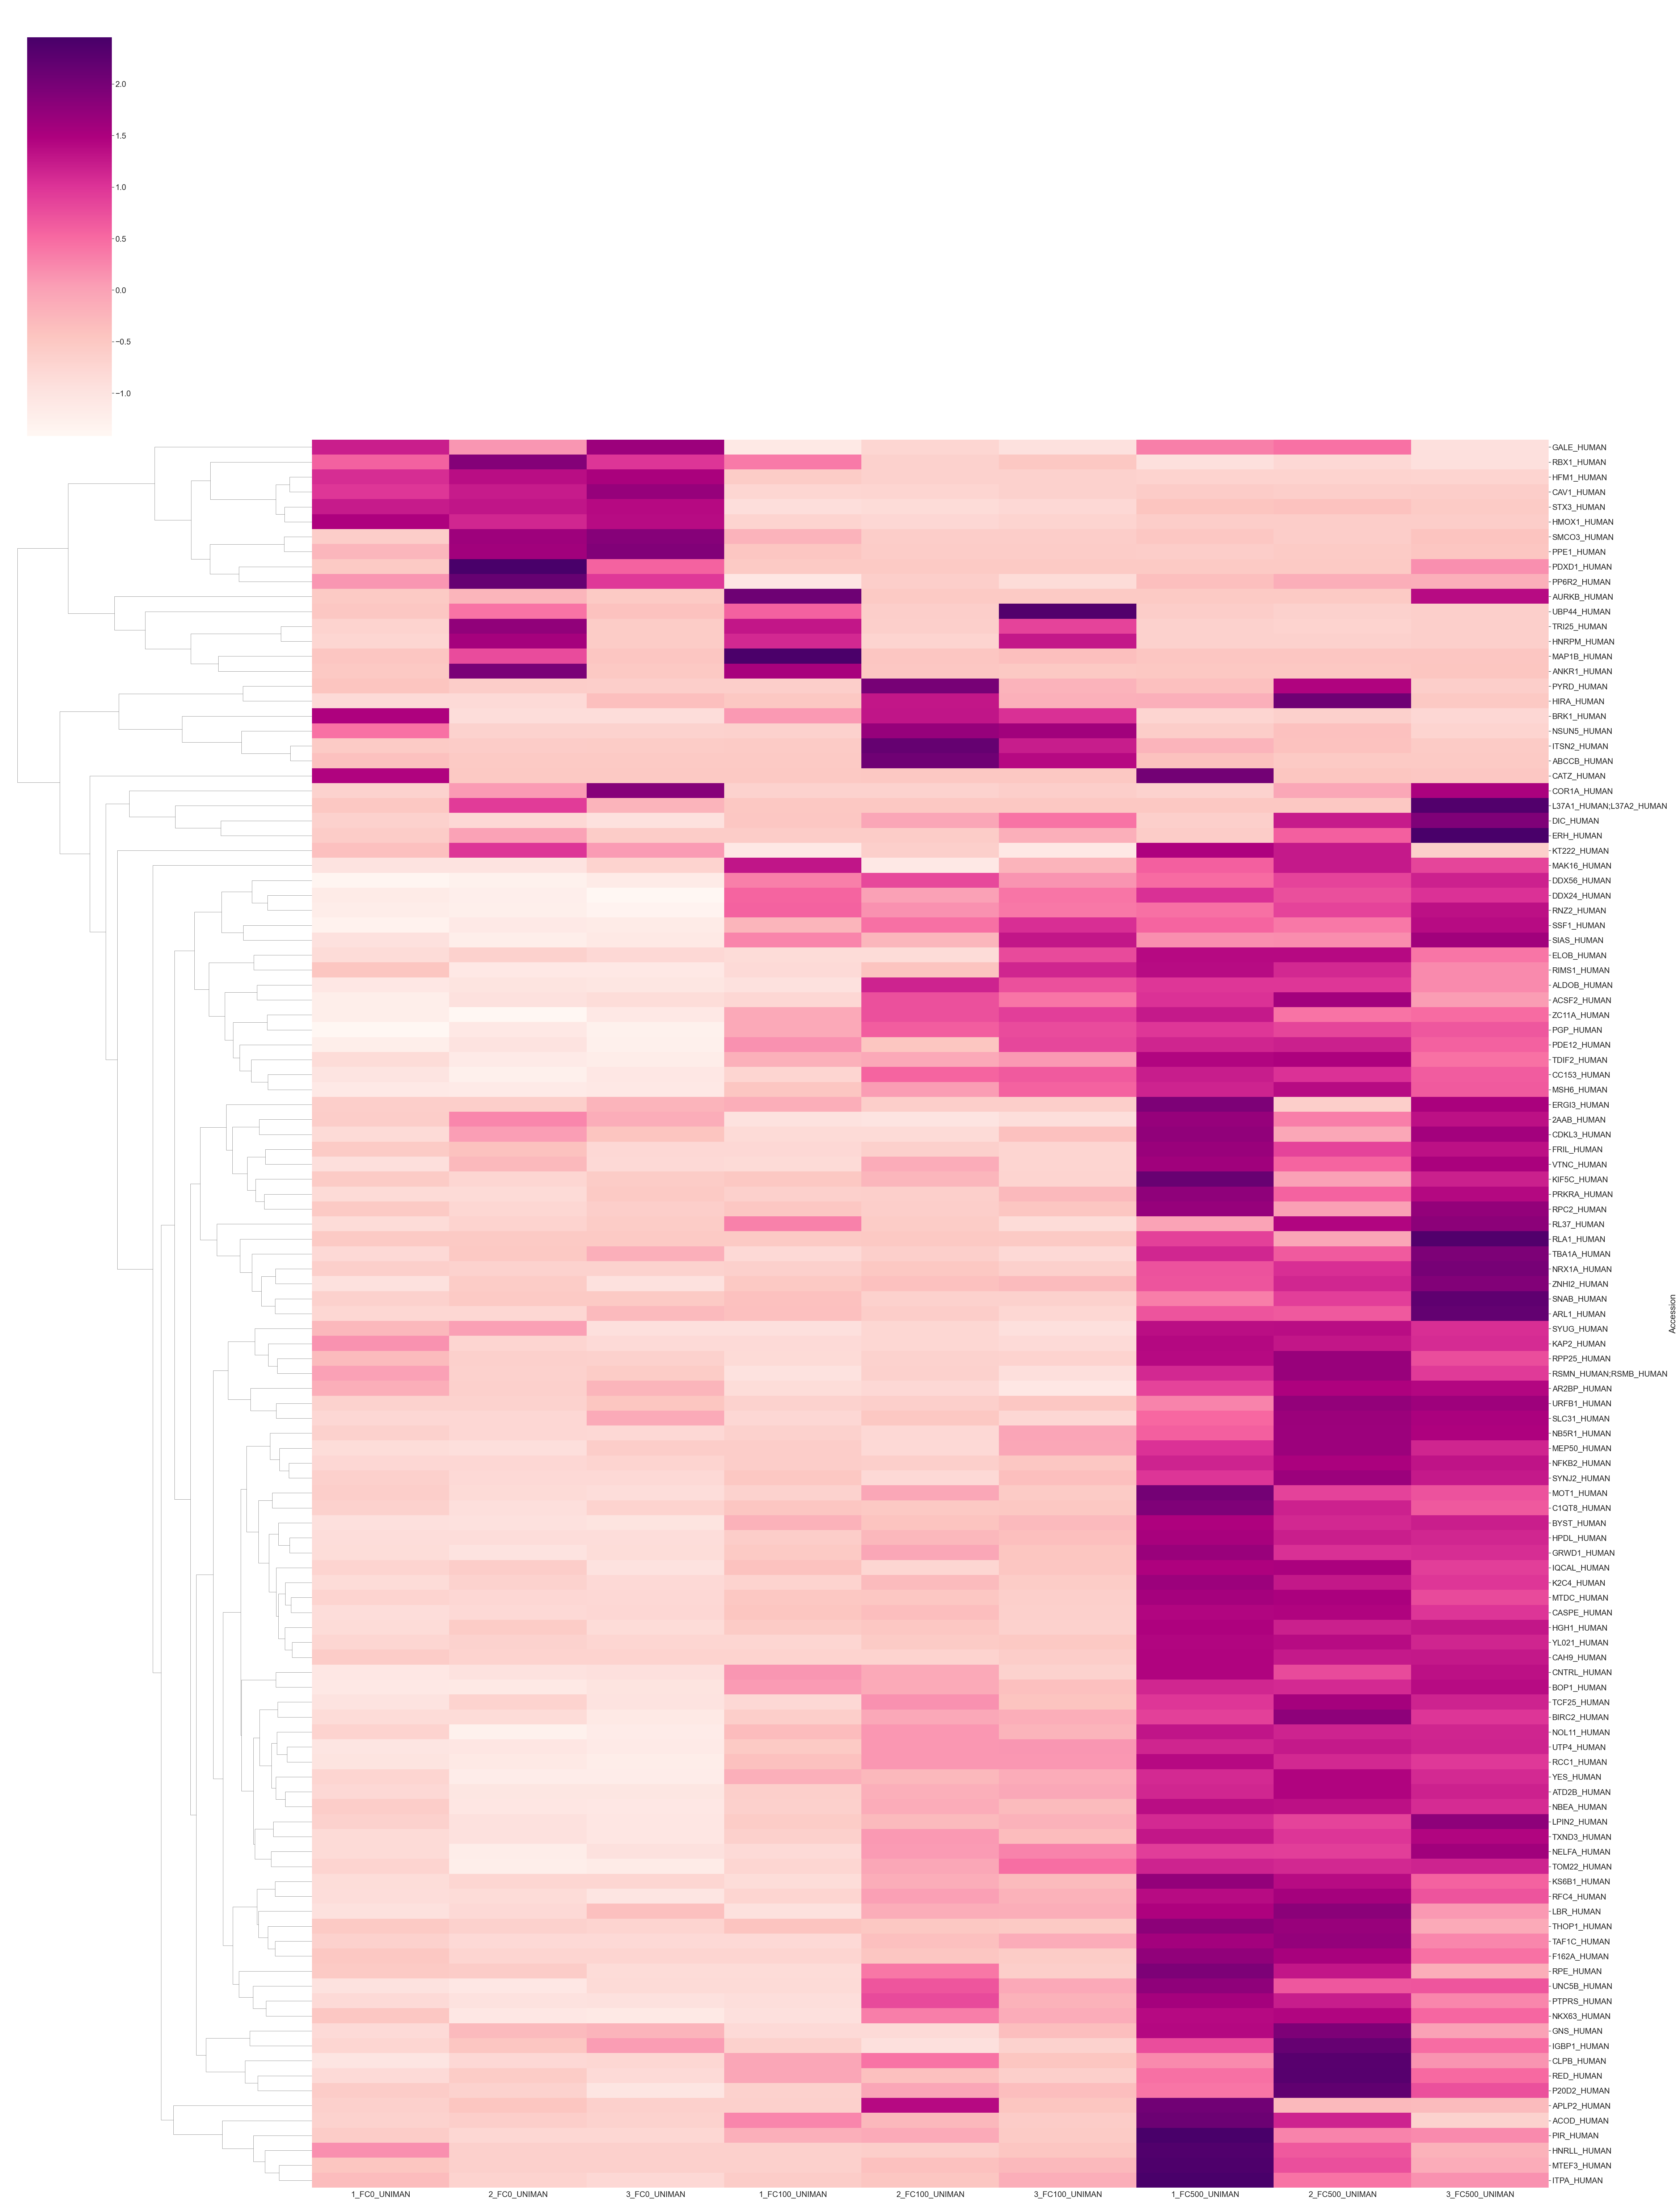

In [11]:
#Heat map for proteins with normalised FC between 3 and 12.
#All of this dataset fits in one heat map. 
df_norm_row=data.sub(data.mean(axis=1), axis=0)
df_norm_row=df_norm_row.div( data.std(axis=1), axis=0 )
sns.set(font_scale = 2)
sns.clustermap(df_norm_row.iloc[0:118, 0:10], cmap='RdPu', figsize=(65,85), col_cluster=False)
plt.savefig('12052021above3FC.png')

In [12]:
#Loading dataset for proteins with FC of infinity (so could not be normalised).
data = pd.read_csv(r'/Users/katemeeson/Library/Mobile Documents/com~apple~CloudDocs/MRC-DTP PhD UoM/Modelling/Proteomics/Subsets for heatmaps /12052021 infinity.csv', index_col=[0])
N, D = data.shape
print('Samples: %s, Proteins: %s'%(D, N))
data

Samples: 9, Proteins: 79


,1_FC0_UNIMAN,2_FC0_UNIMAN,3_FC0_UNIMAN,1_FC100_UNIMAN,2_FC100_UNIMAN,3_FC100_UNIMAN,1_FC500_UNIMAN,2_FC500_UNIMAN,3_FC500_UNIMAN
Accession,,,,,,,,,
IF4E_HUMAN,0.0,0.0,0.0,0.000000,0.000000,0.000000,28.338929,27.840268,40.798217
PERI_HUMAN,0.0,0.0,0.0,0.000000,0.000000,0.000000,7.669405,10.311900,9.692083
IFM1_HUMAN;IFM2_HUMAN;IFM3_HUMAN,0.0,0.0,0.0,141.100707,67.453476,105.257364,303.739613,328.885556,466.076144
HPBP1_HUMAN,0.0,0.0,0.0,0.000000,0.000000,0.000000,28.487784,30.054430,17.224477
ASB10_HUMAN,0.0,0.0,0.0,0.000000,0.000000,0.000000,65.214768,26.830506,41.484865
...,...,...,...,...,...,...,...,...,...
TMC5A_HUMAN,0.0,0.0,0.0,0.000000,6.590687,0.000000,15.954585,0.000000,0.000000
BAG5_HUMAN,0.0,0.0,0.0,0.000000,4.792419,0.000000,0.000000,7.812379,0.000000
IBP7_HUMAN,0.0,0.0,0.0,0.000000,1.040180,0.000000,1.287415,0.000000,0.000000


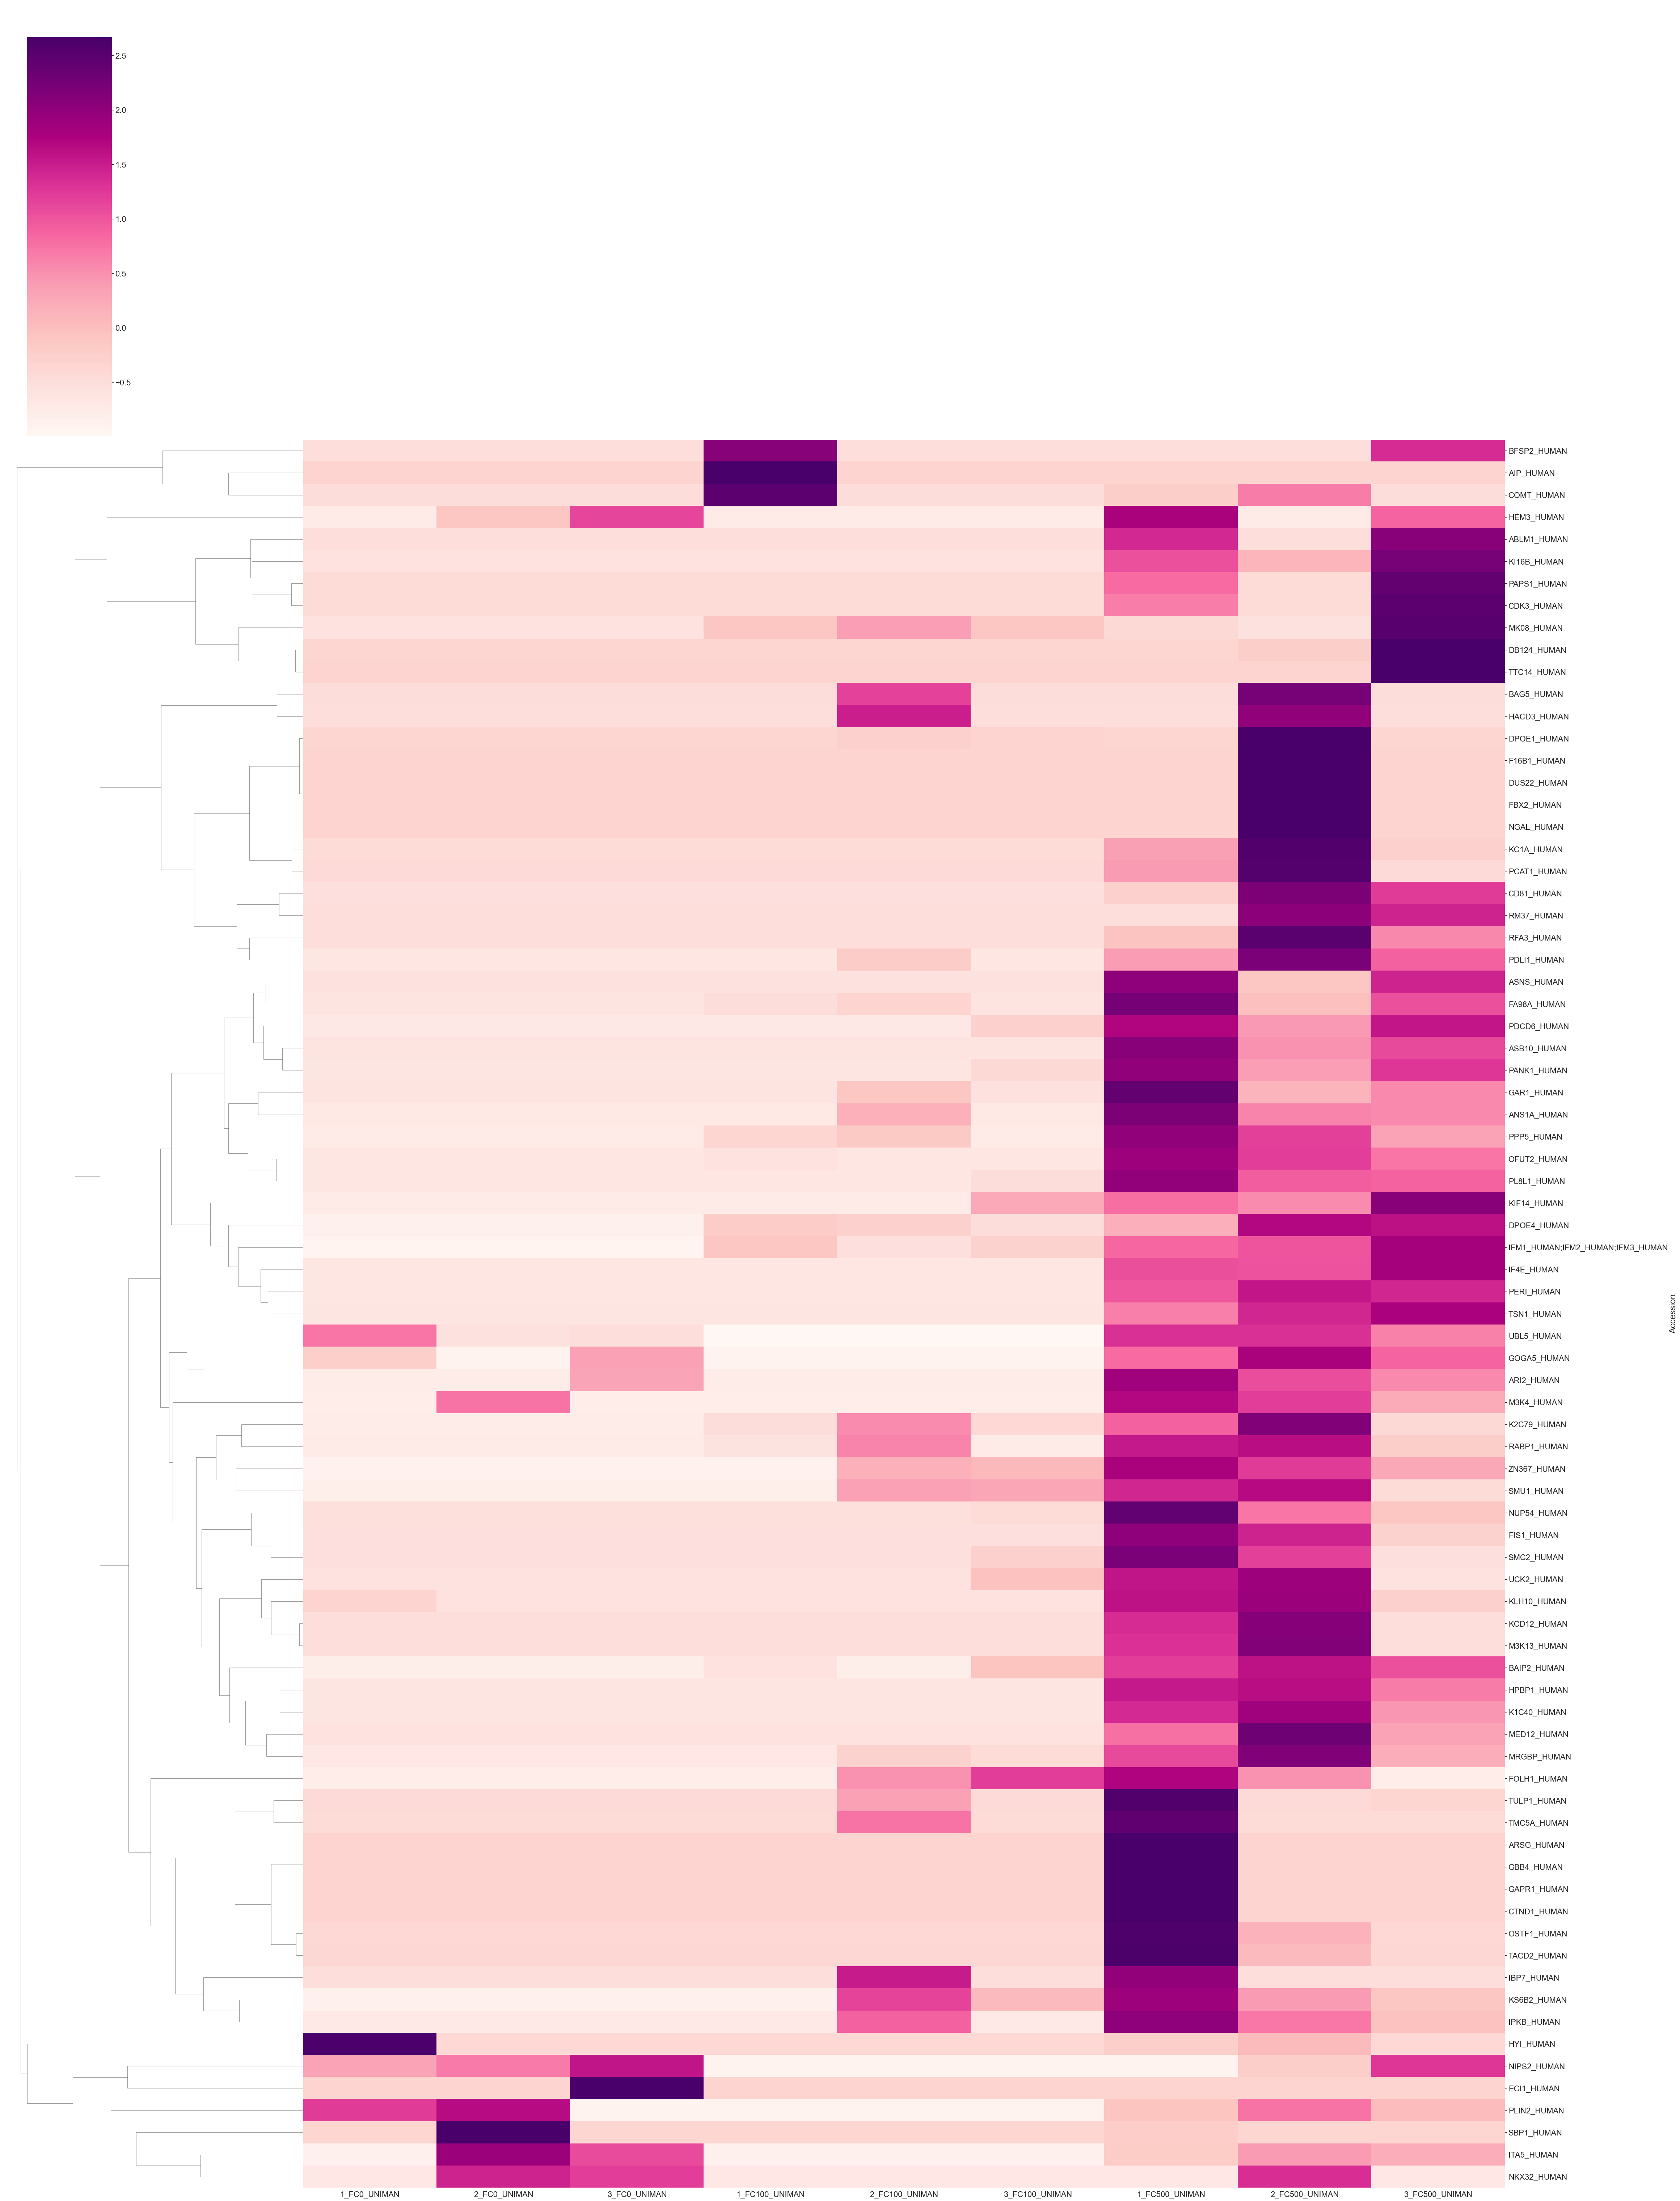

In [14]:
#Heat map for proteins with FC of infinity. 
df_norm_row=data.sub(data.mean(axis=1), axis=0)
df_norm_row=df_norm_row.div( data.std(axis=1), axis=0 )
sns.set(font_scale = 2)
sns.clustermap(df_norm_row.iloc[0:80, 0:10], cmap='RdPu', figsize=(65,85), col_cluster=False)
plt.savefig('12052021.png')